In [1]:
# Ejemplo "ropa": Demostrar el uso de TensorFlow para crear y entrenar un modeloa red neuronal
#   convolucional ( CNN ) que pueda clasificar imágenes de prendas de vestir. 
# DataSet contiene 70,000 imágenes en escala de grises de prendas de vestir, características:
#  - Tamaño: 28x28 píxeles - Tipo: Escala de grises ( un solo canal )
#  - Valores: entre 0(blanco) y 255(negro)
# Hay 10 categorías de prendas

In [3]:
import tensorflow as tf
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Paso 1: Carga de datos
print("Cargando el dataset Fashion MNIST...")
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Cargando el dataset Fashion MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Nombres de las clases
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolsa', 'Botín']

In [7]:
# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"Forma de los datos de entrenamiento: {train_images.shape}")
print(f"Forma de los datos de prueba: {test_images.shape}")

Forma de los datos de entrenamiento: (60000, 28, 28)
Forma de los datos de prueba: (10000, 28, 28)


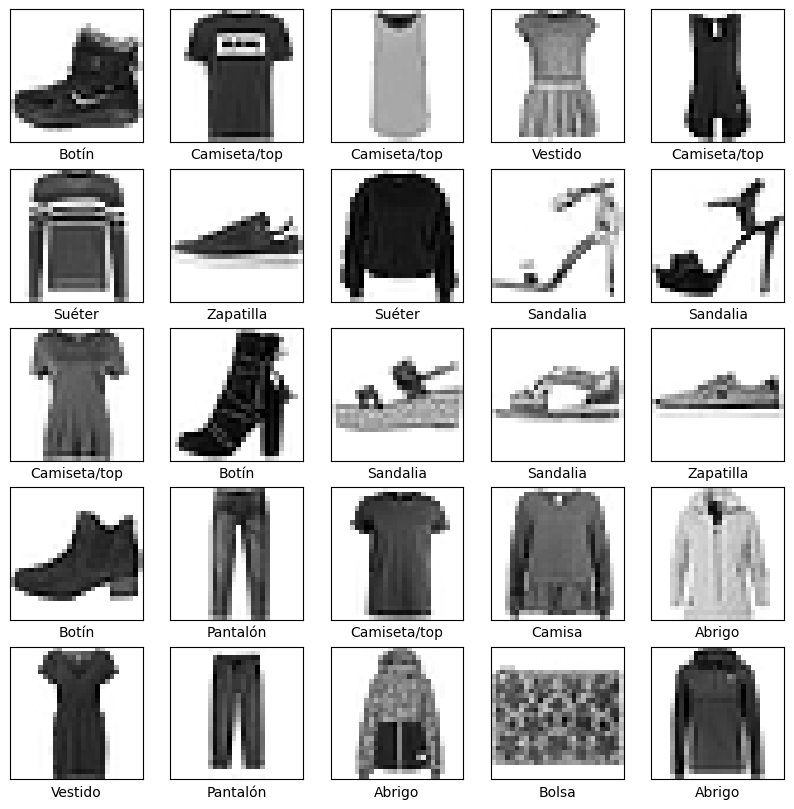

In [8]:
# Paso 2: Visualización de algunos ejemplos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Paso 3: Construcción del modelo
print("Construyendo el modelo...")
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Construyendo el modelo...


/home/gera/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Paso 4: Entrenamiento del modelo
print("Entrenando el modelo...")
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10, 
                    validation_split=0.1, verbose=1)

Entrenando el modelo...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0970 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3028
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3030
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3027
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0969 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3030
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1020 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0962 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - ac

In [13]:
# Paso 5: Evaluación del modelo
print("Evaluando el modelo...")
test_loss, test_acc = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

Evaluando el modelo...
313/313 - 1s - 3ms/step - accuracy: 0.1000 - loss: 2.3026

Precisión en el conjunto de prueba: 0.1000


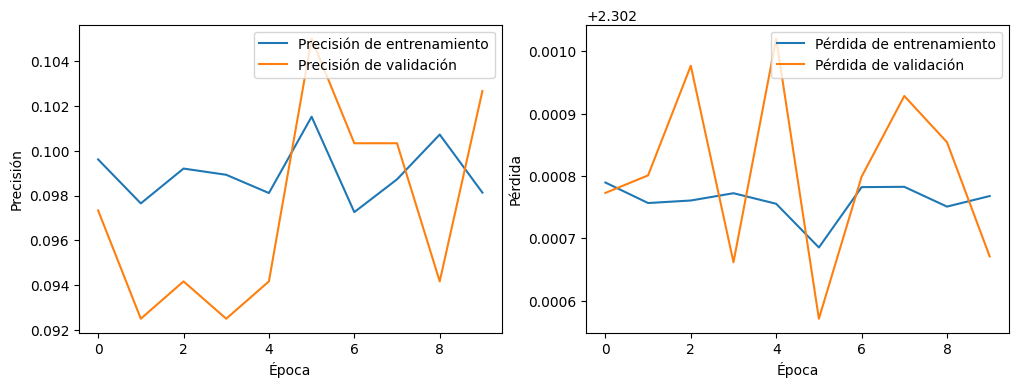

In [15]:
# Paso 6: Visualización del proceso de entrenamiento
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [16]:
# Paso 7: Predicciones en el conjunto de prueba
predictions = model.predict(test_images[..., np.newaxis])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
# Función para plotear una imagen y su predicción
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

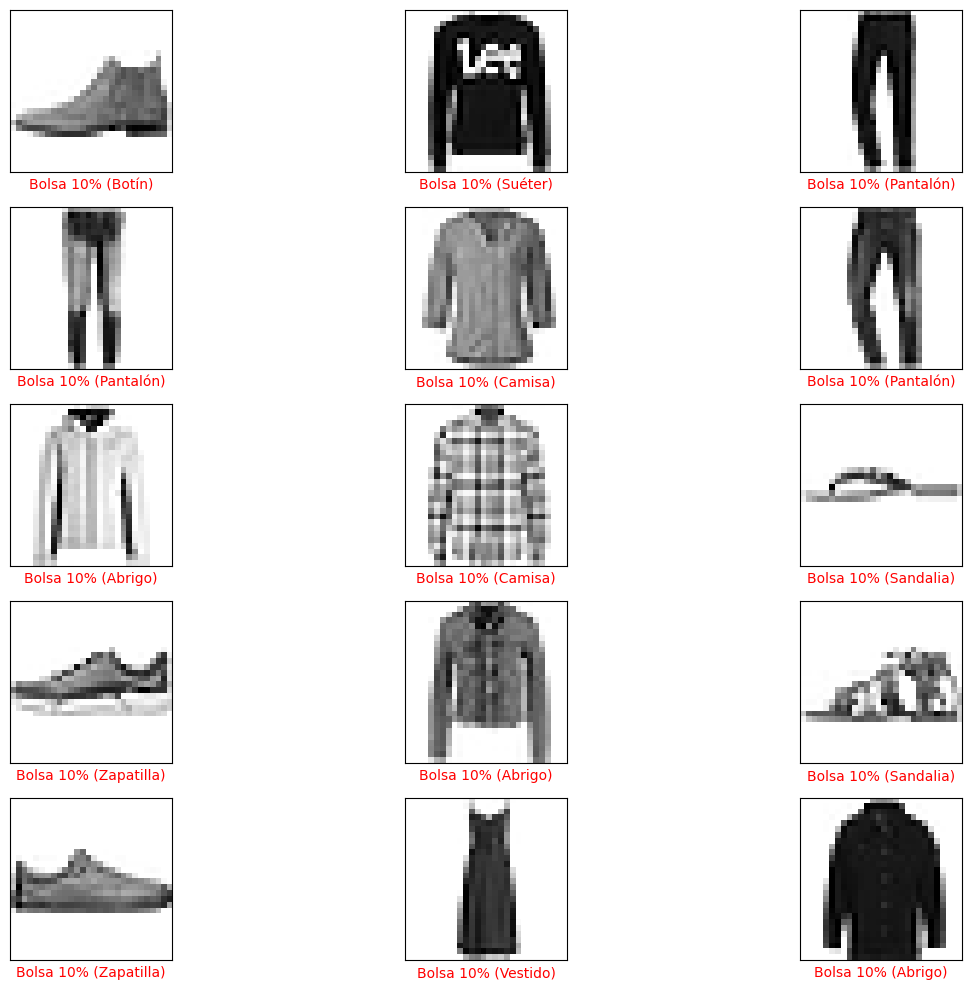

In [18]:
# Visualización de algunas predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

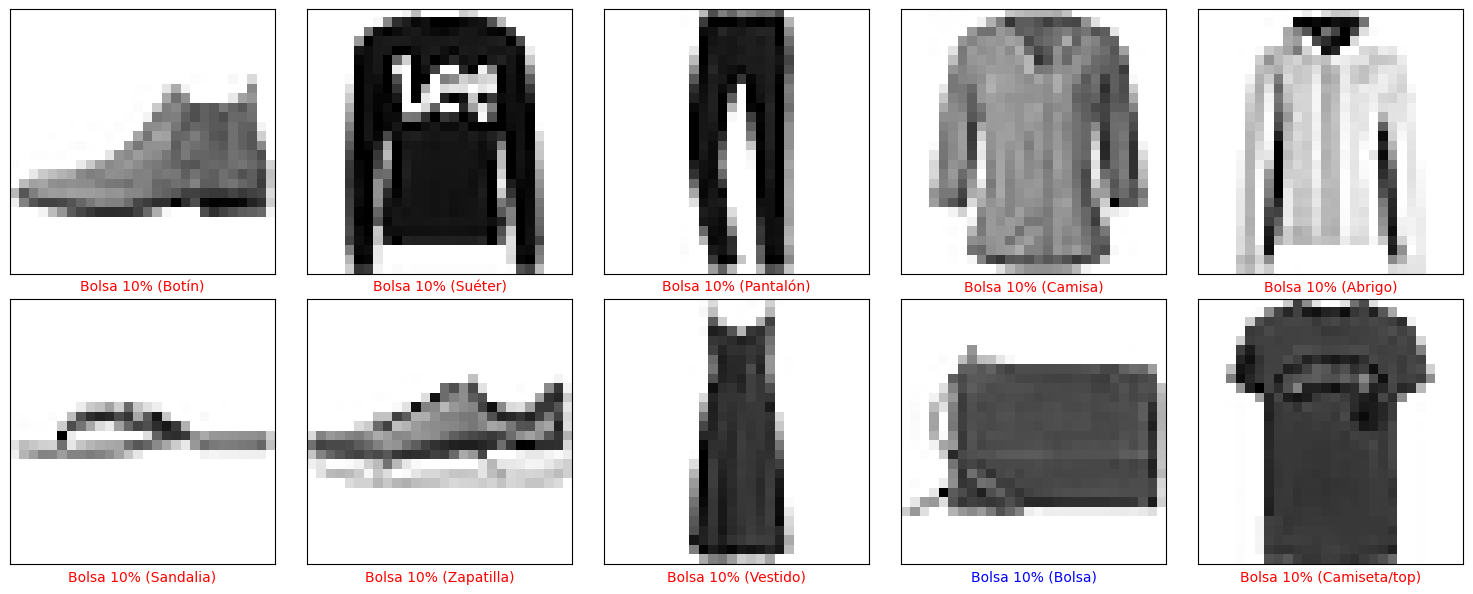

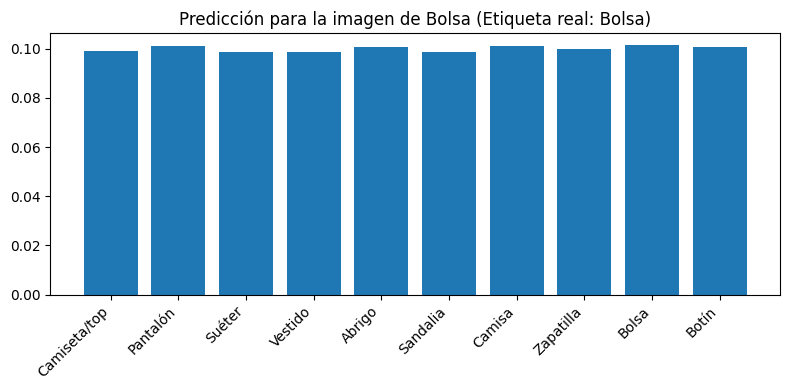

Probabilidades para la imagen de Bolsa:
Camiseta/top: 9.90%
Pantalón: 10.09%
Suéter: 9.86%
Vestido: 9.88%
Abrigo: 10.07%
Sandalia: 9.88%
Camisa: 10.10%
Zapatilla: 10.00%
Bolsa: 10.14%
Botín: 10.07%


In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que el modelo ya está entrenado y tenemos las predicciones

# Nombres de las clases
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolsa', 'Botín']

# Función para plotear una imagen y su predicción
def plot_image(ax, predictions_array, true_label, img):
    img = img.reshape((28, 28))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    ax.set_xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Función para encontrar un ejemplo de cada clase
def find_examples(test_labels, num_classes=10):
    examples = {}
    for i, label in enumerate(test_labels):
        if label not in examples:
            examples[label] = i
        if len(examples) == num_classes:
            break
    return examples

# Encontrar un ejemplo de cada clase
examples = find_examples(test_labels)

# Visualización de predicciones para cada clase
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, (label, index) in enumerate(examples.items()):
    plot_image(axes[i], predictions[index], test_labels[index], test_images[index])

plt.tight_layout()
plt.show()

# Visualización detallada de la predicción para la clase "Bolsa"
bolsa_index = examples[8]  # 8 es el índice de la clase "Bolsa"
bolsa_prediction = predictions[bolsa_index]

plt.figure(figsize=(8, 4))
plt.bar(class_names, bolsa_prediction)
plt.title(f"Predicción para la imagen de Bolsa (Etiqueta real: {class_names[test_labels[bolsa_index]]})")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Probabilidades para la imagen de Bolsa:")
for i, prob in enumerate(bolsa_prediction):
    print(f"{class_names[i]}: {prob*100:.2f}%")